In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\jcord\AppData\Local\Temp\ipykernel_6964\493776363.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The UNSW dataset
Published in "UNSW-NB15: A Comprehensive Data set for Network
Intrusion Detection systems" https://ieeexplore.ieee.org/document/7348942

This data set has a hybrid of the real modern normal and the contemporary synthesized attack activities of the network traffic. Existing and novel methods are utilised to generate the features of the UNSWNB15 data set.

The dataset contains 47 features per observation, which include:

- basic features (i.e., destination bits per second)
- flow features (source IP address, etc.), 
- content features (i.e., Mean of the flow packet size transmitted by the dst ), 
- time features (Source inter-packet arrival time),
- derived or generated features (i. e., No. of flows that has methods such as Get and Post in http service. )
- connection features (i.e., No. of connections that contain the same service (14) and source address (1) in 100 connections according to the last time (26). )


# Explore the dataset

In [2]:
# read data frame
df = pd.read_csv('UNSW_NB15_training-set.csv')
print("Shape of data frame ", df.shape[0])
print("Set of 10 records")
df.head(10)

df.describe(include = "all")

Shape of data frame  82332
Set of 10 records


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,82332.000000,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332,82332.000000
unique,NaN,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37000,NaN
mean,41166.500000,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,...,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,NaN,0.550600
std,23767.345519,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,...,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,NaN,0.497436
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20583.750000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41166.500000,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61749.250000,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,...,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,NaN,1.000000


# Basic preprocessing

In [3]:
# drop the id and attack category, not used 
list_drop = ['id','attack_cat']
df.drop(list_drop, axis=1,inplace = True)


We need to be careful with the range anda values of the histogram:


array([[<Axes: title={'center': 'label'}>]], dtype=object)

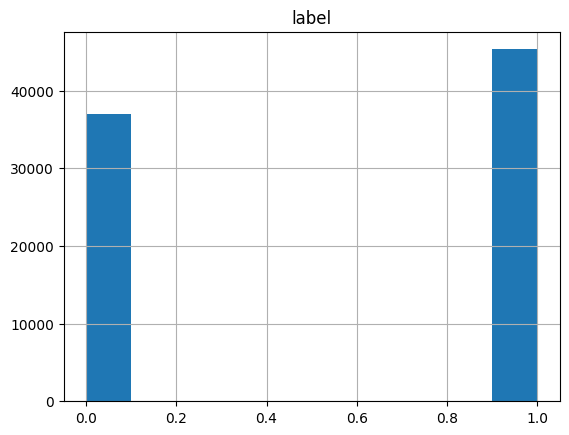

In [4]:
print("We need to be careful with the range anda values of the histogram:")
df.hist(column = "label")

In [5]:
#get set of records with label 0 and 1
# Extract rows with label equal to 0
rows_with_label_0 = df[df['label'] == 0]

print(rows_with_label_0.shape)

# Extract rows with label equal to 1
rows_with_label_1 = df[df['label'] == 1]

print(rows_with_label_1.shape)

(37000, 43)
(45332, 43)


In [20]:
def plot_histogram(hist_values, bin_edges, title = "Histogram of Number of Rows with Label 0"):
    # Plot the histogram using matplotlib
    plt.hist(hist_values, bins=bin_edges, edgecolor='black')
    plt.title(title)
    plt.xlabel("Number of Rows")
    plt.ylabel("Frequency")
    plt.show()

In [25]:
print(df)
#plot_histogram(df, 2)

            dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.000011   udp       -   INT      2      0     496       0   
1      0.000008   udp       -   INT      2      0    1762       0   
2      0.000005   udp       -   INT      2      0    1068       0   
3      0.000006   udp       -   INT      2      0     900       0   
4      0.000010   udp       -   INT      2      0    2126       0   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate  sttl  ...  ct_src_dport_ltm  ct_dst_sport_ltm  \
0       90909.090200   254  ...                 1                 1   
1      125000.000300   254  .

# Encode the categorical features
The features state, protocol  and service (number 1, 2 and 3) are encoded  using one hot vector encoding, as those are categorical variables.



## First reduce the cardinality to reduce one hot encoded features dimensionality

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X.head()
feature_names = list(X.columns)
print("Original dimensionality before one hot encoding: ")
print("X  shape ", X.shape)

print("Number of different values per column using the dataframe ")
df.describe(include='all')




Original dimensionality before one hot encoding: 
X  shape  (82332, 42)
Number of different values per column using the dataframe 


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332,82332,82332,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
unique,NaN,131,13,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,43095,47153,39339,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.006756,NaN,NaN,NaN,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,4.710444,NaN,NaN,NaN,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.014138,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719360,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000


The variable state has 7 different values, service 13 and protocol 131... perhaps there are too many values for each column. Therefore we can reduce the *cardinality* of the columns to use the 6 most frequent values. Otherwise, the dimensionality of the one hot vector variables will be too high!

In [8]:
#data frame with only the categorical variables
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

#service also defines the '-' category (to represent an unknown service) 


,proto,service,state
count,82332,82332,82332
unique,131,13,7
top,tcp,-,FIN
freq,43095,47153,39339


In [9]:
# Los valores fuera de los 6 mas frecuentes

DEBUG = 1
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print("Is the cardinality higher than 6? ", df_cat[feature].nunique()>6)
        print("Number of preserved records: ", sum(df[feature].isin(df[feature].value_counts().head().index)))
        print("New categories: (- takes the rest of categories)", df[feature].value_counts().head().index)
        print('----------------------------------------------------')
    
    if df_cat[feature].nunique()>6:
        #preserve only the records with values within the first 5 most frequent values (default by pandas)
        #replace with '-' if the value is not between the 5 most frequent
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')
        
# Los valores en los menos frecuentes se pone un guion

proto
nunique = 131
Is the cardinality higher than 6?  True
Number of preserved records:  77691
New categories: (- takes the rest of categories) Index(['tcp', 'udp', 'unas', 'arp', 'ospf'], dtype='object', name='proto')
----------------------------------------------------
service
nunique = 13
Is the cardinality higher than 6?  True
Number of preserved records:  80210
New categories: (- takes the rest of categories) Index(['-', 'dns', 'http', 'smtp', 'ftp'], dtype='object', name='service')
----------------------------------------------------
state
nunique = 7
Is the cardinality higher than 6?  True
Number of preserved records:  82330
New categories: (- takes the rest of categories) Index(['FIN', 'INT', 'CON', 'REQ', 'ACC'], dtype='object', name='state')
----------------------------------------------------


Let's see how the dataframe of categorical variables ended (much less unique values must appear): 

In [10]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,82332,82332,82332
unique,6,5,6
top,tcp,-,FIN
freq,43095,49275,39339


## Encode cardinality reduced columns
A total of 6 + 5 + 6 = 17 features are added, to the 42 - 3 = 39 features
We yield then 39 + 17 = 56 columns or fields

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
feature_names = list(X.columns)
print("Number of features before one hot encoding: ", len(feature_names))
#create the one hot encoder transformer and transform:
#columns 1, 2 and 3 are the ones to encode
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print("Number of features after one hot encoding: ", X.shape)

Number of features before one hot encoding:  42
Number of features after one hot encoding:  (82332, 56)


# Prepare for model training

## Model metrics

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 5,
                                                    stratify = y)

print("X_train \n ", X_train.shape)
#print("Primer observacion ", X_train[0, :])

print("X_test \n", X_test.shape)

X_train 
  (57632, 56)
X_test 
 (24700, 56)


In [13]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])


We are going to test a logistic regression

In [15]:
#time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression(max_iter = 10000, tol=0.0001).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
print("y_predictions \n ", y_predictions)

end_predict = time.time()

y_predictions 
  [1 1 0 ... 1 1 0]


In [16]:
print("y_predictions \n ", y_predictions)

y_predictions 
  [1 1 0 ... 1 1 0]


#  Test model

In [17]:
y_predictions = np.round(y_predictions).astype(int)
y_test = np.round(y_test).astype(int)
print(y_predictions)
print(y_test)

[1 1 0 ... 1 1 0]
49209    1
55219    1
49381    1
80795    0
49227    1
        ..
68534    0
50391    1
8210     1
57394    1
8154     1
Name: label, Length: 24700, dtype: int32


In [18]:


accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 74.96%
Recall: 74.96%
Precision: 77.04%
F1-Score: 74.90%
time to train: 17.64 s
time to predict: 0.00 s
total: 17.64 s


# ECE calculation

In [19]:
import torch
uncertainty_scores, _ = torch.max(torch.tensor(y_predictions), dim = 1)
print("uncertainty_scores \n ", uncertainty_scores)

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)